<center>&copy; | Ghassen <strong>MARRAKCHI</strong> - 2022</center>

<img src="../__src/Institut_Galilee.png" style="">
<hr>

<h1 style="text-align:center;color:#5a84ba"><center>Méthodes Matricielles pour le Data Mining</center></h1>
<h2><center><strong><font color='#3f4a4f'>Factorisation Matricielle Non-Négative pour
le Text Mining
</font></strong></center></h2>

<hr>
<h3><center><strong><font color='#3f4a4f'>VI- Symmetric NMF</font></strong></center></h3>
<hr>

<h4><strong><font color='#353b38'>Plan de Travail</font></strong></h4>

<ol style="list-style-type: upper-roman;">
    <li><a href="./I-Introduction.ipynb">Introduction</a></li>
    <li><a href="./II-Pré-traitemnt du dataset.ipynb">Pré-traitemnt du dataset</a></li>
    <li><a href="./III-Clustering simple.ipynb">Clustering simple</a></li>
    <li><a href="./IV-NMF.ipynb">NMF</a></li>
    <li><a href="./V-Orthogonal NMF.ipynb">Orthogonal NMF</a></li>
    <li><strong>Symmetric NMF</strong></li>
    <li><a href="./VII-Conclusion.ipynb">Conclusion</a></li>
</ol>

<hr>
<h4><strong><font color='#353b38'>Objectif</font></strong></h4>

- Comprendre le type des données traitées (images).
- Explorer et analyser le dataset.

<h4><strong><font color='#353b38'>Configuration générale du notebook</font></strong></h4>

In [1]:
# Packages Importation
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

from sklearn.decomposition import NMF
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics.pairwise import rbf_kernel, polynomial_kernel
from sklearn import metrics
from scipy.special import rel_entr
from itertools import combinations
from math import ceil

In [2]:
# Files Paths


## PLOTS 2D
VI_SYM_NMF_2D_H_SYMMETRIC_RBF_PNG = os.path.join('..', 'plots', 'VI-Sym-NMF', 'h_sym_2D.png')
VI_SYM_NMF_2D_H_SYMMETRIC_RBF_JPG = os.path.join('..', 'plots', 'VI-Sym-NMF', 'h_sym_2D.jpg')
VI_SYM_NMF_2D_H_SYMMETRIC_RBF_PDF = os.path.join('..', 'plots', 'VI-Sym-NMF', 'h_sym_2D.pdf')

VI_SYM_NMF_2D_H_SYMMETRIC_POLY_PNG = os.path.join('..', 'plots', 'VI-Sym-NMF', 'h_sym_2D.png')
VI_SYM_NMF_2D_H_SYMMETRIC_POLY_JPG = os.path.join('..', 'plots', 'VI-Sym-NMF', 'h_sym_2D.jpg')
VI_SYM_NMF_2D_H_SYMMETRIC_POLY_PDF = os.path.join('..', 'plots', 'VI-Sym-NMF', 'h_sym_2D.pdf')


## PLOTS 3D
VI_SYM_NMF_3D_H_SYMMETRIC_RBF_PNG = os.path.join('..', 'plots', 'VI-Sym-NMF', 'h_sym_3D.png')
VI_SYM_NMF_3D_H_SYMMETRIC_RBF_JPG = os.path.join('..', 'plots', 'VI-Sym-NMF', 'h_sym_3D.jpg')
VI_SYM_NMF_3D_H_SYMMETRIC_RBF_PDF = os.path.join('..', 'plots', 'VI-Sym-NMF', 'h_sym_3D.pdf')

VI_SYM_NMF_3D_H_SYMMETRIC_POLY_PNG = os.path.join('..', 'plots', 'VI-Sym-NMF', 'h_sym_3D.png')
VI_SYM_NMF_3D_H_SYMMETRIC_POLY_JPG = os.path.join('..', 'plots', 'VI-Sym-NMF', 'h_sym_3D.jpg')
VI_SYM_NMF_3D_H_SYMMETRIC_POLY_PDF = os.path.join('..', 'plots', 'VI-Sym-NMF', 'h_sym_3D.pdf')


## CLUSTERING-SIMPLE
CLUST_SIMP_REUT_TEST = os.path.join('..', 'dataset', 'III-Clustering_simple', 'reut_test.csv')
CLUST_SIMP_LABELS_TEST  = os.path.join('..', 'dataset', 'III-Clustering_simple', 'labels_test.csv')


## ORTH-NMF
K_TEST_RBF = os.path.join('..', 'dataset', 'VI-Sym-NMF', 'k_test_rbf.csv')
H_SYMMETRIC_RBF = os.path.join('..', 'dataset', 'VI-Sym-NMF', 'h_sym_rbf.csv')

K_TEST_POLY = os.path.join('..', 'dataset', 'VI-Sym-NMF', 'k_test_poly.csv')
H_SYMMETRIC_POLY = os.path.join('..', 'dataset', 'VI-Sym-NMF', 'h_sym_poly.csv')

<h4><strong><font color='#353b38'>Implémentation des fonctions</font></strong></h4>

<h5 id="print_numpy_array_infos">print_numpy_array_infos</h5>

In [3]:
def print_numpy_array_infos(array, name) :
    """ Prints numpy array informations.
    
    Parameters
    ----------
    array : numpy.ndarray
        The array to print its informations
    name : str
        The name to be used for a formatted printing
    """
    
    print("ARRAY : ", name)
    print("--- Type               : ", type(array))
    print("--- Dimensions         : ", array.shape)
    print("--- Nombre de lignes   : ", array.shape[0])
    print("--- Nombre de colonnes : ", array.shape[1])
    print("--- Nombre totale des données décrites dans le dataset : ", array.size)
    print("--- Type des données : ", array.dtype)

    print("\n")

    print("AFFICHAGE (partie) : \n", array[:5,:])

<h5 id="sym_nmf">sym_nmf</h5>

In [4]:
def sym_nmf(data, nombre) :
    """ Applies the Symmetric NMF rule.
    
    Parameters
    ----------
    data : numpy.ndarray
        The array to be reduced
    nombre : int
        The new dimensions
    """
    
    model = NMF(n_components=4, init='random', max_iter=k_test.size, tol = 1e-5)
    
    # Créating Symmetry
    M = [[np.exp( - np.linalg.norm(v-w) ) for v in k_test] for w in k_test]
    
    # Fitting
    W = model.fit(M)
    H = model.components_
    h = np.argmax(H,0)
    
    return H

<h5 id="sym_nmf_2">sym_nmf_2</h5>

In [5]:
def sym_nmf_2(A = None,k = None,params = None) :
    """ Applies the symmetric NMF rule.
    
    Parameters
    ----------
    data : numpy.ndarray
        The array to be reduced
    nombre : int
        The new dimensions
    """
    
    # shape
    n = A.shape[0]
    
    # initialisation
    H = 2 * np.dot(np.sqrt(np.mean(np.mean(A)) / k), np.random.rand(n,k))
    maxiter = 10000
    tol = 0.0001
    sigma = 0.1
    beta = 0.1
    computeobj = True
    debug = 0
    
    zeros = np.zeros((n,k))
    projnorm_idx = zeros != 0
    R = np.zeros((1,k))
    p = np.zeros((1,k))
    left = np.dot(np.transpose(H), H)
    obj = np.linalg.norm(A, ord='fro')**2 - 2*np.trace(np.dot(np.transpose(H), np.dot(A, H))) + np.trace(np.dot(left,left))
    gradH = 4 * (np.dot(H, (np.dot(np.transpose(H), H))) - np.dot(A, H))
    initgrad = np.linalg.norm(gradH, ord='fro')
    
    for iter in np.arange(1, maxiter+1).reshape(-1):
        gradH = 4 * (np.dot(H, np.dot(np.transpose(H), H)) - np.dot(A, H))
        projnorm_idx_prev = projnorm_idx
        projnorm_idx = gradH <= np.logical_or(np.finfo(float).eps,H) > np.finfo(float).eps
#         projnorm_idx = gradH <= np.finfo(float).eps and H[H > np.finfo(float).eps]
        print(projnorm_idx)
        projnorm = np.linalg.norm(gradH[projnorm_idx], ord='fro')

        if projnorm < tol * initgrad:
            break
            
        if iter % 100 == 0:
            p = np.ones((1,k))
        
        step = np.zeros((n,k))
        hessian = np.zeros((1,k))
        temp = np.dot(H, np.transpose(H)) - A
        
        for i in np.arange(1, k+1).reshape(-1):
            if not projnorm_idx_prev[projnorm_idx_prev[:,i] != projnorm_idx[:,i]][:1].size == 0 :
                hessian[i] = hessian_blkdiag(temp, H, i, projnorm_idx)
                R[i], p[i] = np.linalg.cholesky(hessian[i])
                
            if p(i) > 0:
                step[:,i] = gradH[:,i]
                
            else:
                step_temp = np.linalg.solve(np.transpose(R[i]), gradH[projnorm_idx[:,i], i])
                step_temp = np.linalg.solve(R[i], step_temp)
                step_part = np.zeros((n,1))
                step_part[projnorm_idx[:,i]] = step_temp
                step_part[step_part > (-np.finfo(float).eps) and H[:,i] <= np.finfo(float).eps] = 0
                
                a = np.multiply(gradH[:,i], step_part)
                if(a.dim == 1) :
                    a = np.sum(a)
                else:
                    a = np.sum(a, axis=1)
                
                
                if a / np.linalg.norm(gradH[:,i]) / np.linalg.norm(step_part) <= np.finfo(float).eps:
                    p[i] = 1
                    step[:,i] = gradH[:,i]
                else:
                    step[:,i] = step_part
                
                
        alpha_newton = 1
        Hn = np.amax(H - alpha_newton * step, axis=0)
        left = np.dot(np.transpose(Hn), Hn)
        newobj = np.linalg.norm(A, ord='fro')**2 - 2*np.trace(np.dot(np.transpose(Hn), np.dot(A, Hn))) + np.trace(np.dot(left, left))
        
        a = np.multiply(gradH,(Hn - H))
        if(a.dim == 1) :
            a = np.sum(a)
        else :
            a = np.sum(a, axis=1)
        
        if(a.dim == 1) :
            a = np.sum(a)
        else :
            a = np.sum(a, axis=1)
        
        if newobj - obj > sigma * a:
            
            while True:
                alpha_newton = alpha_newton * beta
                Hn = np.amax(H - alpha_newton * step, axis=0)
                left = np.dot(np.transpose(Hn), Hn)
                newobj = np.linalg.norm(A, ord='fro')**2 - 2*np.trace(np.dot(np.transpose(Hn), np.dot(A, Hn))) + np.trace(np.dot(left, left))
                
                a = np.multiply(gradH,(Hn - H))
                if(a.dim == 1) :
                    a = np.sum(a)
                else :
                    a = np.sum(a, axis=1)

                if(a.dim == 1) :
                    a = np.sum(a)
                else :
                    a = np.sum(a, axis=1)
            
                if newobj - obj <= sigma * a:
                    H = Hn
                    obj = newobj
                    break

        else:
            H = Hn
            obj = newobj
    
    if computeobj == False:
        obj = - 1
    
    return H

<h5 id="calcul_purety_index">calcul_purety_index</h5>

In [6]:
def calcul_purety_index(matrice) :
    """ Find indexes for purity computation.
    
    Parameters
    ----------
    matrice : numpy.ndarray
        The used data
    """
    
    print("------------------------------------------------------------- ")
    print("---- Détermination des labels suivant la matrice de partition ")
    print("------------------------------------------------------------- ")
    
    # Liste des labels
    labels_list = []
    
    # Parcours des valeurs
    for i in range(matrice.shape[1]) :
        # Détermination de l'indice du max
        valeur_max = matrice[:, i].max()
        
        # Il faut noter que nous ne prenions que la première valeur 
        indice_max = np.where(matrice[:, i] == valeur_max)[0][0]
        
        # Affectation de la valeur 
        labels_list.append(indice_max + 1)
        
        # Affichage des résultats 
        print("--------------------------------")
        print("---- colonne : ", i)
        print("---- label associé : ", indice_max + 1)
        
    
    print("--------------------------------")
    
    purity_indexes = np.array(labels_list)
    
    return purity_indexes.reshape((purity_indexes.shape[0], 1))

<h5 id="calcul_purety">calcul_purety</h5>

In [7]:
def calcul_purety(labels_pred, labels_true) :
    """ Comoute purity value.
    
    Parameters
    ----------
    labels_pred : numpy.ndarray
        Labels predicted
    nombre : int
        True labels
    """
    
    print("-------------------------------------- ")
    print("---- Calcul de la pureté de la matrice ")
    print("-------------------------------------- ")
    
    # Matrice de confusion
    matrice_onfusion = metrics.cluster.contingency_matrix(labels_pred, labels_true)
    
    return np.sum(np.amax(matrice_onfusion, axis=0)) / np.sum(matrice_onfusion)

<h5 id="calcul_entropy">calcul_entropy</h5>

In [8]:
def calcul_entropy(labels_pred, labels_true):
    """ Compute Entropy
    
    Parameters
    ----------
    labels_pred : numpy.ndarray
        Labels predicted
    nombre : int
        True labels
    """
    
    print("----------------------------------------------------- ")
    print("---- Calcul de l'entropie de la matrice de la matrice ")
    print("----------------------------------------------------- ")
    
    # Receptionner les classes
    classes = list(set(labels_true.reshape(-1).tolist()))
    print("---- classes prises :", classes)
    
    # Creation de DataFrame
    labels_df = pd.DataFrame(np.concatenate((labels_pred, labels_true), axis=1), columns=['pred', 'true'])
    
    # p
    probabilities_list = [
        [round(labels_df[(labels_df['true'] == label) & (labels_df['pred'] == classe)].shape[0]/ 
               labels_df[labels_df['pred'] == classe].shape[0],3) 
         for label in classes] 
        for classe in classes]
    
    # e_i_j
    classes_entropy = [[p_i_j*math.log(p_i_j) for p_i_j in p_i_j_list if p_i_j!=0] for p_i_j_list in probabilities_list]
    
    # e
    # On note qu'on utilisera le caractère d'ordre d'une liste (La liste ne changera pas l'ordre d ses élements)
    e = [-round(sum(e_i_j_list),3) for e_i_j_list in classes_entropy]
    
    # Moyenne
    e_moyenne = round(sum(e)/len(e), 3)
    print("---- entropie mpoyenne :", e_moyenne)
    
    # Formattage en dictionnaire
    e_dict = {classes[i] : e[i] for i in range(len(e))}
    print("---- entropies des clusters :", e_dict)

    print("----------------------------------------------------- ")
    
    return e_moyenne, e_dict

<h5 id="calcul_DB">calcul_DB</h5>

In [9]:
def calcul_DB(data, label) :
    """ Compute DB value.
    
    Parameters
    ----------
    data : numpy.ndarray
        The array to be reduced
    nombre : int
        The new dimensions
    """
    
    print("------------------------------------------------------- ")
    print("---- Calcul de l'indice Davies&Bouldin-DB de la matrice ")
    print("------------------------------------------------------- ")
    
    valeur = davies_bouldin_score(data, label)
    
    print("---- DB Score : ", valeur)
    print("------------------------------------------------------- ")
    
    return valeur

<h5 id="calcul_CH">calcul_CH</h5>

In [10]:
def calcul_CH(data, label) :
    """ Compute CH value.
    
    Parameters
    ----------
    data : numpy.ndarray
        The array to be reduced
    nombre : int
        The new dimensions
    """
    
    print("--------------------------------------------------------- ")
    print("---- Calcul de l'indice Calinsky&Harabsz-CH de la matrice ")
    print("--------------------------------------------------------- ")
    
    valeur = calinski_harabasz_score(data, label)
    
    print("---- DB Score : ", valeur)
    print("--------------------------------------------------------- ")
    
    return valeur

<h5 id="calcul_KL">calcul_KL</h5>

In [11]:
def calcul_KL(label_pred, label_true) :
    """ compute KL value.
    
    Parameters
    ----------
    labels_pred : numpy.ndarray
        Labels predicted
    label_true : numpy.ndarray
        True labels
    """
    
    print("------------------------------------------------------- ")
    print("---- Calcul de l'indice Krzanowski&Lai-KL de la matrice ")
    print("------------------------------------------------------- ")

    return sum(rel_entr(label_pred, label_true))[0]

<h5 id="delta">delta</h5>

In [12]:
def delta(ck, cl):
    """ delta [CVI]
    
    Parameters
    ----------
    ck : int
        cluster index
    cl : int
        cluster index
    """
    
    values = np.ones([len(ck), len(cl)])*10000
    
    for i in range(0, len(ck)):
        for j in range(0, len(cl)):
            values[i, j] = np.linalg.norm(ck[i]-cl[j])
            
    return np.min(values)

<h5 id="big_delta">big_delta</h5>

In [13]:
def big_delta(ci):
    """ Big delta [CVI]
    
    Parameters
    ----------
    ci : int
        cluster index
    """
    
    values = np.zeros([len(ci), len(ci)])
    
    for i in range(0, len(ci)):
        for j in range(0, len(ci)):
            values[i, j] = np.linalg.norm(ci[i]-ci[j])
            
    return np.max(values)
    

<h5 id="dunn">dunn</h5>

In [14]:
def dunn(k_list):
    """ Dunn index [CVI]
    
    Parameters
    ----------
    k_list : list of np.arrays
        A list containing a numpy array for each cluster |c| = number of clusters
        c[K] is np.array([N, p]) (N : number of samples in cluster K, p : sample dimension)
    """
    
    deltas = np.ones([len(k_list), len(k_list)])*1000000
    big_deltas = np.zeros([len(k_list), 1])
    l_range = list(range(0, len(k_list)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta(k_list[k], k_list[l])
        
        big_deltas[k] = big_delta(k_list[k])

    di = np.min(deltas)/np.max(big_deltas)
    
    return di

<h5 id="calcul_Dunn">calcul_Dunn</h5>

In [15]:
def calcul_Dunn(data, label) :
    """ Compute the Dunn internal value
    
    Parameters
    ----------
    data : numpy.ndarray
        The array to be reduced
    label : numpy.array
        1-D vector
    """
    
    print("------------------------------------------------------- ")
    print("---- Calcul de l'indice Dunn de la matrice ")
    print("------------------------------------------------------- ")
    
    # Receptionner les classes
    classes = list(set(label.reshape(-1).tolist()))
    print("---- classes prises :", classes)
    
    
    labels_df = pd.DataFrame(label, columns=['label'])
    
    prediction = pd.concat([pd.DataFrame(data), labels_df], axis = 1)
    
    # Clusters
    clusters = []
    for classe in classes :
        filtered = prediction.loc[prediction['label'] == classe]
        del filtered['label']
        # print(filtered.head())
        clusters.append(filtered.to_numpy())
    
    return dunn(clusters)

<h5 id="plot_clusters3D">plot_clusters3D</h5>

In [16]:
def plot_clusters3D(data, label, path) :
    """ plot the clusters
    
    Parameters
    ----------
    data : numpy.ndarray
        The array to be reduced
    label : numpy.array
        1-D vector
    path : os.path
        path of the figure to be saved in
    """
    
    # Affichage
    print("------------------------------------------------------- ")
    print("---- plot clusters ")
    print("------------------------------------------------------- ")
    
    # set up plot
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    fig.suptitle('Clustering Simple visualized in 3D', fontsize=16)
    fig.tight_layout()
    
    # Plot
    ax.scatter3D(data[:,0], data[:,1], data[:,2], c=label, cmap='cool')
    plt.title("Clustering simple (Avec MAX)")
    
    #show the plot
    plt.show()

    # Enregistrement des figures
    fig.savefig(path)

<h5 id="plot_clusters2D">plot_clusters2D</h5>

In [17]:
def plot_clusters2D(data, label, path) :
    """ plot the clusters
    
    Parameters
    ----------
    data : numpy.ndarray
        The array to be reduced
    label : numpy.array
        1-D vector
    path : os.path
        path of the figure to be saved in
    """
    
    # Affichage
    print("------------------------------------------------------- ")
    print("---- plot clusters ")
    print("------------------------------------------------------- ")
    
    # Combinaison
    attributes = [i for i in range(data.shape[1])]
    combis = list(combinations(attributes, 2)) 
    number_combi = len(combis)
    number_ligne = ceil(number_combi/2)
    number_colon = 2
    
    # set up plot
    fig, axs = plt.subplots(number_ligne, number_colon, sharex=False, sharey=False)
    fig.suptitle('Clustering Simple visualized in 2D', fontsize=16)
    fig.tight_layout()
    
    # Subplots
    for i in range(number_combi) :
        colonne = i%2
        ligne = i//2
        axs[ligne, colonne].scatter(data[:,combis[i][0]], data[:,combis[i][1]], c=label, cmap='Dark2')    
        axs[ligne, colonne].set_title("Terms ({0}, {1})".format(combis[i][0], combis[i][1]))
    
    #show the plot
    plt.show()
    
    # Enregistrement des figures
    fig.savefig(path)

<h4><strong><font color='#353b38'>Récupération des données</font></strong></h4>

<h5>reut_test</h5>

In [18]:
pandas_loaded_data = pd.read_csv(CLUST_SIMP_REUT_TEST)
pandas_loaded_data.head()

,0,1,2,3,4,5,6,7,8,9,...,18923,18924,18925,18926,18927,18928,18929,18930,18931,18932
0,0.025356,0.257628,0.093497,0.102688,0.365650,0.106026,0.0,0.115535,0.000,0.125644,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.038247,0.129537,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.088,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.058681,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.016681,0.084746,0.092267,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.041330,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.029868,0.000000,0.000000,0.181445,0.369192,0.124895,0.0,0.136096,0.000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
reut_test = pandas_loaded_data.to_numpy()
print_numpy_array_infos(reut_test, "reut_test")

ARRAY :  reut_test
--- Type               :  <class 'numpy.ndarray'>
--- Dimensions         :  (100, 18933)
--- Nombre de lignes   :  100
--- Nombre de colonnes :  18933
--- Nombre totale des données décrites dans le dataset :  1893300
--- Type des données :  float64


AFFICHAGE (partie) : 
 [[0.02535579 0.2576279  0.09349706 ... 0.         0.         0.        ]
 [0.03824711 0.12953679 0.         ... 0.         0.         0.        ]
 [0.05868105 0.         0.         ... 0.         0.         0.        ]
 [0.01668142 0.08474589 0.09226669 ... 0.         0.         0.        ]
 [0.02986835 0.         0.         ... 0.         0.         0.        ]]


<strong>| Définition de la fonction <a href="#print_numpy_array_infos"> print_numpy_array_infos</a> |</strong>

<h5>labels_test</h5>

In [20]:
pandas_loaded_data = pd.read_csv(CLUST_SIMP_LABELS_TEST)
pandas_loaded_data.head()

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [21]:
labels_test = pandas_loaded_data.to_numpy()
print_numpy_array_infos(labels_test, "labels_test")

ARRAY :  labels_test
--- Type               :  <class 'numpy.ndarray'>
--- Dimensions         :  (100, 1)
--- Nombre de lignes   :  100
--- Nombre de colonnes :  1
--- Nombre totale des données décrites dans le dataset :  100
--- Type des données :  float64


AFFICHAGE (partie) : 
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


<strong>| Définition de la fonction <a href="#print_numpy_array_infos"> print_numpy_array_infos</a> |</strong>

<strong><font color='#5a84ba'>Question 4/</font></strong>

<h4><strong><font color='#353b38'>Application de la symmetric NMF</font></strong></h4>

<strong><font color='#5a84ba'>Question 4.a/</font></strong>

Nous allons calculer la matrice de Gram **K_test**

<h5>K_test</h5>

In [22]:
k_test = rbf_kernel(reut_test, reut_test, gamma=1.0)

In [23]:
print_numpy_array_infos(k_test, "k_test")

ARRAY :  k_test
--- Type               :  <class 'numpy.ndarray'>
--- Dimensions         :  (100, 100)
--- Nombre de lignes   :  100
--- Nombre de colonnes :  100
--- Nombre totale des données décrites dans le dataset :  10000
--- Type des données :  float64


AFFICHAGE (partie) : 
 [[1.         0.14495733 0.13573861 0.14546072 0.20449516 0.24594852
  0.17777924 0.22325256 0.14345924 0.21787211 0.20496444 0.25739405
  0.21214112 0.22589331 0.13560485 0.13583396 0.17686072 0.2523521
  0.24152693 0.21975282 0.1596074  0.26001137 0.13583039 0.20267274
  0.28405193 0.13652244 0.13856178 0.13545808 0.1371932  0.13930663
  0.13541611 0.14011385 0.13561809 0.14754325 0.13880936 0.13561613
  0.13555205 0.13548133 0.13792576 0.13774584 0.1366118  0.13950871
  0.13897287 0.13548132 0.13948959 0.13560346 0.1461117  0.13718454
  0.13610545 0.13545094 0.13547428 0.13540409 0.13771371 0.1380723
  0.1355192  0.13660713 0.13538426 0.14253126 0.13629202 0.1565242
  0.13551529 0.13809059 0.14280527 0.14

<strong>| Définition de la fonction <a href="#print_numpy_array_infos"> print_numpy_array_infos</a> |</strong>

In [24]:
pandas_loaded_data = pd.DataFrame(k_test)

<h5>Symmetric NMF</h5>

In [25]:
H_symmetric = sym_nmf(k_test, 4)

<strong>| Définition de la fonction <a href="#sym_nmf"> sym_nmf</a> |</strong>

<h5>H_symmetric</h5>

In [26]:
print_numpy_array_infos(H_symmetric, "H_symmetric")

ARRAY :  H_symmetric
--- Type               :  <class 'numpy.ndarray'>
--- Dimensions         :  (4, 100)
--- Nombre de lignes   :  4
--- Nombre de colonnes :  100
--- Nombre totale des données décrites dans le dataset :  400
--- Type des données :  float64


AFFICHAGE (partie) : 
 [[0.21479045 0.20279954 0.20300525 0.24777247 0.20855567 0.21310132
  0.21203633 0.19416265 0.22938372 0.21069477 0.2057845  0.2090516
  0.22059069 0.2187969  0.21268281 0.21065385 0.20667892 0.20591274
  0.20114985 0.21541763 0.22285657 0.21817848 0.19892319 0.2155037
  0.2042636  0.23078121 0.2257527  0.2202472  0.23918864 0.22970995
  0.22919373 0.23059092 0.22893802 0.2365826  0.22448735 0.22746743
  0.22888962 0.22700749 0.22477268 0.23301829 0.22670323 0.22544211
  0.22483107 0.22498014 0.22777892 0.22326018 0.23006566 0.22935405
  0.22642954 0.22898167 0.28346025 0.25063153 0.36391225 0.47356758
  0.25466089 0.33764074 0.24137661 0.37180295 0.28989418 0.27807742
  0.2599158  0.30713245 0.28818426 0.65

<strong>| Définition de la fonction <a href="#print_numpy_array_infos"> print_numpy_array_infos</a> |</strong>

In [27]:
pd.DataFrame(H_symmetric).head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.214790,0.202800,0.203005,0.247772,0.208556,0.213101,0.212036,0.194163,0.229384,0.210695,...,0.219948,0.186917,0.201462,0.165373,0.250033,0.166019,0.205458,0.170200,0.131996,0.227936
1,0.402252,0.220111,0.204999,0.218936,0.475704,0.414431,0.301503,0.533741,0.229644,0.447464,...,0.256404,0.221026,0.224678,0.224149,0.202312,0.218904,0.213213,0.226402,0.262425,0.227824
2,0.188561,0.401975,0.404939,0.330040,0.072740,0.173164,0.289450,0.000000,0.342522,0.128267,...,0.290180,0.282867,0.318360,0.251673,0.315528,0.249393,0.323489,0.242960,0.000000,0.330775
3,0.143316,0.152676,0.164548,0.200161,0.149158,0.142804,0.166960,0.123733,0.192483,0.147029,...,0.260057,0.418984,0.329771,0.506583,0.258864,0.516805,0.325056,0.520889,0.864627,0.220337


In [28]:
# Enregistrement F
pd.DataFrame(k_test).to_csv(K_TEST_RBF, index=False)

In [29]:
# Enregistrement F
pd.DataFrame(H_symmetric).to_csv(H_SYMMETRIC_RBF, index=False)

<strong><font color='#5a84ba'>Question 4.b/</font></strong>

<h5>Indices</h5>

<h6><font color='#353b38'>Indices Externes</font></h6>

<i>- Pureté</i>

In [30]:
H_symmetric_index_purity = calcul_purety_index(H_symmetric)

------------------------------------------------------------- 
---- Détermination des labels suivant la matrice de partition 
------------------------------------------------------------- 
--------------------------------
---- colonne :  0
---- label associé :  2
--------------------------------
---- colonne :  1
---- label associé :  3
--------------------------------
---- colonne :  2
---- label associé :  3
--------------------------------
---- colonne :  3
---- label associé :  3
--------------------------------
---- colonne :  4
---- label associé :  2
--------------------------------
---- colonne :  5
---- label associé :  2
--------------------------------
---- colonne :  6
---- label associé :  2
--------------------------------
---- colonne :  7
---- label associé :  2
--------------------------------
---- colonne :  8
---- label associé :  3
--------------------------------
---- colonne :  9
---- label associé :  2
--------------------------------
---- colonne :  10
---- labe

<strong>| Définition de la fonction <a href="#calcul_purety_index"> calcul_purety_index</a> |</strong>

In [31]:
print_numpy_array_infos(H_symmetric_index_purity, "H_test_index_purity")

ARRAY :  H_test_index_purity
--- Type               :  <class 'numpy.ndarray'>
--- Dimensions         :  (100, 1)
--- Nombre de lignes   :  100
--- Nombre de colonnes :  1
--- Nombre totale des données décrites dans le dataset :  100
--- Type des données :  int64


AFFICHAGE (partie) : 
 [[2]
 [3]
 [3]
 [3]
 [2]]


<strong>| Définition de la fonction <a href="#print_numpy_array_infos"> print_numpy_array_infos</a> |</strong>

In [32]:
pd.DataFrame(H_symmetric_index_purity).head()

,0
0,2
1,3
2,3
3,3
4,2


In [33]:
H_symmetric_purity = calcul_purety(H_symmetric_index_purity, labels_test)

-------------------------------------- 
---- Calcul de la pureté de la matrice 
-------------------------------------- 


<strong>| Définition de la fonction <a href="#calcul_purety"> calcul_purety</a> |</strong>

In [34]:
print("---- Purity = ", H_symmetric_purity)

---- Purity =  0.73


<i>- Entropy</i>

In [35]:
calcul_entropy(H_symmetric_index_purity, labels_test)

----------------------------------------------------- 
---- Calcul de l'entropie de la matrice de la matrice 
----------------------------------------------------- 
---- classes prises : [1.0, 2.0, 3.0, 4.0]
---- entropie mpoyenne : 0.313
---- entropies des clusters : {1.0: -0.0, 2.0: -0.0, 3.0: 1.252, 4.0: -0.0}
----------------------------------------------------- 


(0.313, {1.0: -0.0, 2.0: -0.0, 3.0: 1.252, 4.0: -0.0})

<strong>| Définition de la fonction <a href="#calcul_entropy"> calcul_entropy</a> |</strong>

<h6><font color='#353b38'>Indices Externes</font></h6>

<i>- Davies&amp;Bouldin-DB</i>

In [36]:
DB_H_symmetric = calcul_DB(np.transpose(H_symmetric), labels_test.reshape(-1))

------------------------------------------------------- 
---- Calcul de l'indice Davies&Bouldin-DB de la matrice 
------------------------------------------------------- 
---- DB Score :  0.9808010094709512
------------------------------------------------------- 


<i>- Calinsky&amp;Harabsz-CH</i>

In [37]:
CH_H_symmetric = calcul_CH(np.transpose(H_symmetric), labels_test.reshape(-1))

--------------------------------------------------------- 
---- Calcul de l'indice Calinsky&Harabsz-CH de la matrice 
--------------------------------------------------------- 
---- DB Score :  31.989186345688267
--------------------------------------------------------- 


<i>- Krzanowski&amp;Lai-KL</i>

In [38]:
KL_H_symmetric = calcul_KL(np.transpose(H_symmetric), labels_test)

------------------------------------------------------- 
---- Calcul de l'indice Krzanowski&Lai-KL de la matrice 
------------------------------------------------------- 


In [39]:
print("---- Krzanowski&Lai-KL = ", KL_H_symmetric)

---- Krzanowski&Lai-KL =  -53.90564674219201


<i>- Dunn</i>

In [40]:
Dunn_H_symmetric = calcul_Dunn(np.transpose(H_symmetric), labels_test)

------------------------------------------------------- 
---- Calcul de l'indice Dunn de la matrice 
------------------------------------------------------- 
---- classes prises : [1.0, 2.0, 3.0, 4.0]


<strong><font color='#5a84ba'>Question 4.c/</font></strong>

<h5>Visualisation</h5>

<i>- 3D</i>

------------------------------------------------------- 
---- plot clusters 
------------------------------------------------------- 


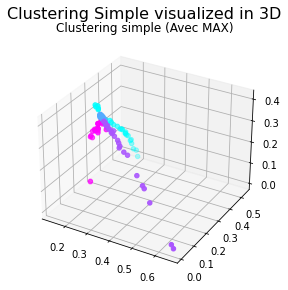

------------------------------------------------------- 
---- plot clusters 
------------------------------------------------------- 


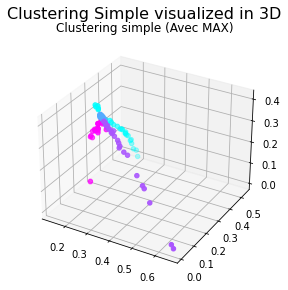

------------------------------------------------------- 
---- plot clusters 
------------------------------------------------------- 


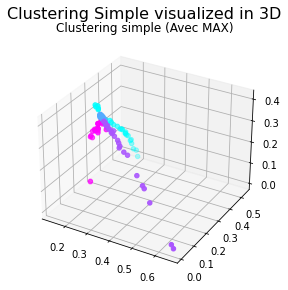

In [41]:
plot_clusters3D(np.transpose(H_symmetric), labels_test, VI_SYM_NMF_3D_H_SYMMETRIC_RBF_PNG)
plot_clusters3D(np.transpose(H_symmetric), labels_test, VI_SYM_NMF_3D_H_SYMMETRIC_RBF_JPG)
plot_clusters3D(np.transpose(H_symmetric), labels_test, VI_SYM_NMF_3D_H_SYMMETRIC_RBF_PDF)

<strong>| Définition de la fonction <a href="#plot_clusters3D"> plot_clusters3D</a> |</strong>

<i>- 2D</i>

------------------------------------------------------- 
---- plot clusters 
------------------------------------------------------- 


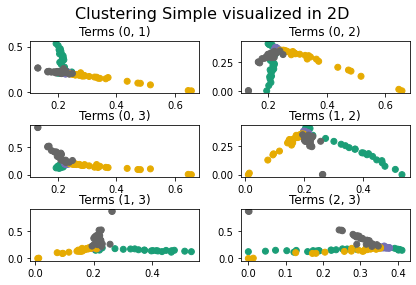

------------------------------------------------------- 
---- plot clusters 
------------------------------------------------------- 


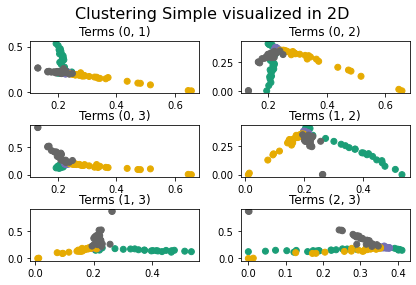

------------------------------------------------------- 
---- plot clusters 
------------------------------------------------------- 


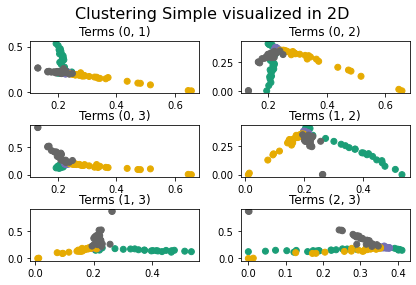

In [42]:
plot_clusters2D(np.transpose(H_symmetric), labels_test, VI_SYM_NMF_2D_H_SYMMETRIC_RBF_PNG)
plot_clusters2D(np.transpose(H_symmetric), labels_test, VI_SYM_NMF_2D_H_SYMMETRIC_RBF_JPG)
plot_clusters2D(np.transpose(H_symmetric), labels_test, VI_SYM_NMF_2D_H_SYMMETRIC_RBF_PDF)

<strong>| Définition de la fonction <a href="#plot_clusters2D"> plot_clusters2D</a> |</strong>

<strong><font color='#5a84ba'>Question 4.d/</font></strong>

Nous allons calculer la matrice de Gram **K_test** avec le kernel polynomial

<h5>K_test</h5>

In [43]:
k_test = polynomial_kernel(reut_test, reut_test, gamma=1.0, degree=2, coef0=0)

In [44]:
print_numpy_array_infos(k_test, "k_test")

ARRAY :  k_test
--- Type               :  <class 'numpy.ndarray'>
--- Dimensions         :  (100, 100)
--- Nombre de lignes   :  100
--- Nombre de colonnes :  100
--- Nombre totale des données décrites dans le dataset :  10000
--- Type des données :  float64


AFFICHAGE (partie) : 
 [[1.00000000e+00 1.17937828e-03 2.21385898e-06 1.30143550e-03
  4.25986980e-02 8.92118249e-02 1.86032271e-02 6.26371749e-02
  8.49595991e-04 5.66804108e-02 4.30731044e-02 1.03314961e-01
  5.05117632e-02 6.56147542e-02 9.89879039e-07 3.38183423e-06
  1.79034085e-02 9.70540744e-02 8.38756050e-02 5.87451769e-02
  6.80309770e-03 1.06592484e-01 3.33373107e-06 4.07711418e-02
  1.37419151e-01 1.90695867e-05 1.38780265e-04 2.05651753e-07
  4.64775882e-05 2.09123441e-04 8.91273241e-08 3.01023004e-04
  1.08943053e-06 1.86477529e-03 1.60607494e-04 1.07435664e-06
  6.40350701e-07 2.90811303e-07 8.98731076e-05 7.79244222e-05
  2.20337411e-05 2.30610901e-04 1.75873282e-04 2.90772263e-07
  2.28534432e-04 9.79711501e-07 1.

<strong>| Définition de la fonction <a href="#print_numpy_array_infos"> print_numpy_array_infos</a> |</strong>

In [45]:
pandas_loaded_data = pd.DataFrame(k_test)

<h5>Symmetric NMF</h5>

In [46]:
H_symmetric = sym_nmf(k_test, 4)

<strong>| Définition de la fonction <a href="#sym_nmf"> sym_nmf</a> |</strong>

<h5>H_symmetric</h5>

In [47]:
print_numpy_array_infos(H_symmetric, "H_symmetric")

ARRAY :  H_symmetric
--- Type               :  <class 'numpy.ndarray'>
--- Dimensions         :  (4, 100)
--- Nombre de lignes   :  4
--- Nombre de colonnes :  100
--- Nombre totale des données décrites dans le dataset :  400
--- Type des données :  float64


AFFICHAGE (partie) : 
 [[2.31126025e-01 3.40304838e-01 3.40832037e-01 3.25517183e-01
  7.67605988e-02 2.09974733e-01 3.01910545e-01 0.00000000e+00
  3.26426749e-01 1.55025294e-01 1.07015048e-01 1.95465136e-01
  2.65525356e-01 2.53571197e-01 3.36930472e-01 3.36082134e-01
  2.86384426e-01 2.12730403e-01 6.15711144e-02 2.52843097e-01
  3.11789511e-01 2.27438059e-01 3.40771750e-01 2.81629887e-01
  1.63246669e-01 3.30530325e-01 3.31563610e-01 3.30855444e-01
  3.30135100e-01 3.30128210e-01 3.30756903e-01 3.30333827e-01
  3.30343177e-01 3.27997461e-01 3.31997754e-01 3.30831230e-01
  3.30556102e-01 3.31541762e-01 3.31000123e-01 3.29719193e-01
  3.31024015e-01 3.30565872e-01 3.31384071e-01 3.33398488e-01
  3.30615435e-01 3.32776131e-01 3.2

<strong>| Définition de la fonction <a href="#print_numpy_array_infos"> print_numpy_array_infos</a> |</strong>

In [48]:
pd.DataFrame(H_symmetric).head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.231126,0.340305,0.340832,0.325517,0.076761,0.209975,0.301911,0.000000,0.326427,0.155025,...,0.325531,0.323938,0.334628,0.329159,0.327608,0.336046,0.337174,0.327693,0.000161,0.332219
1,0.076841,0.122947,0.124736,0.136457,0.036220,0.073492,0.108804,0.000000,0.133250,0.054288,...,0.119414,0.120747,0.128431,0.109926,0.139233,0.109021,0.128362,0.111072,0.058406,0.128283
2,0.170011,0.178428,0.178650,0.187597,0.168172,0.172135,0.175187,0.152661,0.187284,0.168935,...,0.182552,0.231231,0.197394,0.243119,0.193443,0.233810,0.193976,0.251581,0.799233,0.183156
3,0.428830,0.242297,0.234877,0.250186,0.612362,0.454715,0.298355,0.706867,0.251376,0.528556,...,0.266858,0.219920,0.237508,0.203041,0.241238,0.199857,0.233294,0.202598,0.066060,0.249585


In [49]:
# Enregistrement F
pd.DataFrame(k_test).to_csv(K_TEST_POLY, index=False)

In [50]:
# Enregistrement F
pd.DataFrame(H_symmetric).to_csv(H_SYMMETRIC_POLY, index=False)

<h5>Indices</h5>

<h6><font color='#353b38'>Indices Externes</font></h6>

<i>- Pureté</i>

In [51]:
H_symmetric_index_purity = calcul_purety_index(H_symmetric)

------------------------------------------------------------- 
---- Détermination des labels suivant la matrice de partition 
------------------------------------------------------------- 
--------------------------------
---- colonne :  0
---- label associé :  4
--------------------------------
---- colonne :  1
---- label associé :  1
--------------------------------
---- colonne :  2
---- label associé :  1
--------------------------------
---- colonne :  3
---- label associé :  1
--------------------------------
---- colonne :  4
---- label associé :  4
--------------------------------
---- colonne :  5
---- label associé :  4
--------------------------------
---- colonne :  6
---- label associé :  1
--------------------------------
---- colonne :  7
---- label associé :  4
--------------------------------
---- colonne :  8
---- label associé :  1
--------------------------------
---- colonne :  9
---- label associé :  4
--------------------------------
---- colonne :  10
---- labe

<strong>| Définition de la fonction <a href="#calcul_purety_index"> calcul_purety_index</a> |</strong>

In [52]:
print_numpy_array_infos(H_symmetric_index_purity, "H_test_index_purity")

ARRAY :  H_test_index_purity
--- Type               :  <class 'numpy.ndarray'>
--- Dimensions         :  (100, 1)
--- Nombre de lignes   :  100
--- Nombre de colonnes :  1
--- Nombre totale des données décrites dans le dataset :  100
--- Type des données :  int64


AFFICHAGE (partie) : 
 [[4]
 [1]
 [1]
 [1]
 [4]]


<strong>| Définition de la fonction <a href="#print_numpy_array_infos"> print_numpy_array_infos</a> |</strong>

In [53]:
pd.DataFrame(H_symmetric_index_purity).head()

,0
0,4
1,1
2,1
3,1
4,4


In [54]:
H_symmetric_purity = calcul_purety(H_symmetric_index_purity, labels_test)

-------------------------------------- 
---- Calcul de la pureté de la matrice 
-------------------------------------- 


<strong>| Définition de la fonction <a href="#calcul_purety"> calcul_purety</a> |</strong>

In [55]:
print("---- Purity = ", H_symmetric_purity)

---- Purity =  0.83


<i>- Entropy</i>

In [56]:
calcul_entropy(H_symmetric_index_purity, labels_test)

----------------------------------------------------- 
---- Calcul de l'entropie de la matrice de la matrice 
----------------------------------------------------- 
---- classes prises : [1.0, 2.0, 3.0, 4.0]
---- entropie mpoyenne : 0.332
---- entropies des clusters : {1.0: 1.326, 2.0: -0.0, 3.0: -0.0, 4.0: -0.0}
----------------------------------------------------- 


(0.332, {1.0: 1.326, 2.0: -0.0, 3.0: -0.0, 4.0: -0.0})

<strong>| Définition de la fonction <a href="#calcul_entropy"> calcul_entropy</a> |</strong>

<h6><font color='#353b38'>Indices Externes</font></h6>

<i>- Davies&amp;Bouldin-DB</i>

In [57]:
DB_H_symmetric = calcul_DB(np.transpose(H_symmetric), labels_test.reshape(-1))

------------------------------------------------------- 
---- Calcul de l'indice Davies&Bouldin-DB de la matrice 
------------------------------------------------------- 
---- DB Score :  1.50154784027035
------------------------------------------------------- 


<i>- Calinsky&amp;Harabsz-CH</i>

In [58]:
CH_H_symmetric = calcul_CH(np.transpose(H_symmetric), labels_test.reshape(-1))

--------------------------------------------------------- 
---- Calcul de l'indice Calinsky&Harabsz-CH de la matrice 
--------------------------------------------------------- 
---- DB Score :  13.575354718864608
--------------------------------------------------------- 


<i>- Krzanowski&amp;Lai-KL</i>

In [59]:
KL_H_symmetric = calcul_KL(np.transpose(H_symmetric), labels_test)

------------------------------------------------------- 
---- Calcul de l'indice Krzanowski&Lai-KL de la matrice 
------------------------------------------------------- 


In [60]:
print("---- Krzanowski&Lai-KL = ", KL_H_symmetric)

---- Krzanowski&Lai-KL =  -57.70055654140862


<i>- Dunn</i>

In [61]:
Dunn_H_symmetric = calcul_Dunn(np.transpose(H_symmetric), labels_test)

------------------------------------------------------- 
---- Calcul de l'indice Dunn de la matrice 
------------------------------------------------------- 
---- classes prises : [1.0, 2.0, 3.0, 4.0]


<strong><font color='#5a84ba'>Question 4.c/</font></strong>

<h5>Visualisation</h5>

<i>- 3D</i>

------------------------------------------------------- 
---- plot clusters 
------------------------------------------------------- 


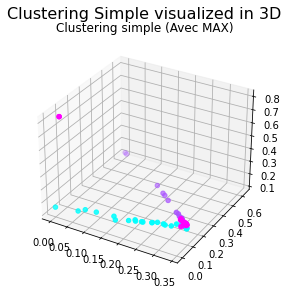

------------------------------------------------------- 
---- plot clusters 
------------------------------------------------------- 


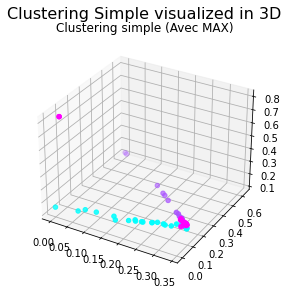

------------------------------------------------------- 
---- plot clusters 
------------------------------------------------------- 


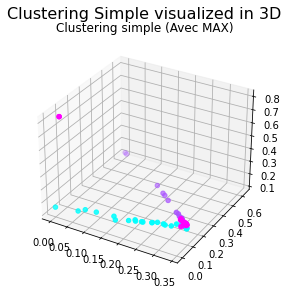

In [62]:
plot_clusters3D(np.transpose(H_symmetric), labels_test, VI_SYM_NMF_3D_H_SYMMETRIC_POLY_PNG)
plot_clusters3D(np.transpose(H_symmetric), labels_test, VI_SYM_NMF_3D_H_SYMMETRIC_POLY_JPG)
plot_clusters3D(np.transpose(H_symmetric), labels_test, VI_SYM_NMF_3D_H_SYMMETRIC_POLY_PDF)

<strong>| Définition de la fonction <a href="#plot_clusters3D"> plot_clusters3D</a> |</strong>

<i>- 2D</i>

------------------------------------------------------- 
---- plot clusters 
------------------------------------------------------- 


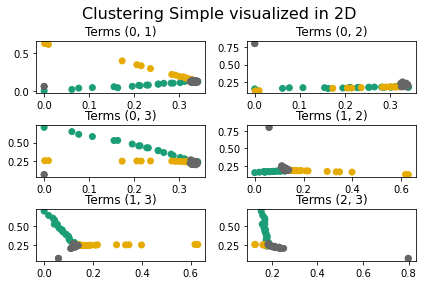

------------------------------------------------------- 
---- plot clusters 
------------------------------------------------------- 


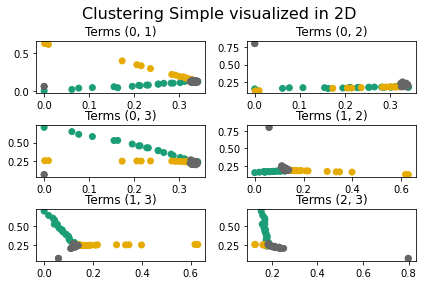

------------------------------------------------------- 
---- plot clusters 
------------------------------------------------------- 


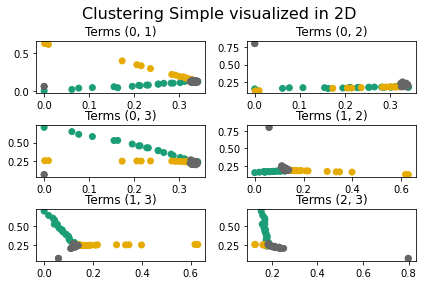

In [63]:
plot_clusters2D(np.transpose(H_symmetric), labels_test, VI_SYM_NMF_2D_H_SYMMETRIC_POLY_PNG)
plot_clusters2D(np.transpose(H_symmetric), labels_test, VI_SYM_NMF_2D_H_SYMMETRIC_POLY_JPG)
plot_clusters2D(np.transpose(H_symmetric), labels_test, VI_SYM_NMF_2D_H_SYMMETRIC_POLY_PDF)

<strong>| Définition de la fonction <a href="#plot_clusters2D"> plot_clusters2D</a> |</strong>

<hr>
<div style="display: flex;">
    <div style="margin: 10px;"><strong><a href="./V-Orthogonal NMF.ipynb">précédent</a></strong></div>
    <div style="margin: 10px;"><strong><a href="./VII-Conclusion.ipynb">suivant</a></strong></div>
</div>